In [1]:
import math
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import mlx.core as mx

from main import *

%load_ext autoreload
%autoreload 2

In [2]:
X_train, y_train, X_test, y_test, true_params = load_tanh(ntrain=32, return_true=True)

X_train, y_train, X_test, y_test = map(mx.array, (X_train, y_train, X_test, y_test))

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (32, 2)
Training labels shape:  (32,)
Test data shape:  (8, 2)
Test labels shape:  (8,)


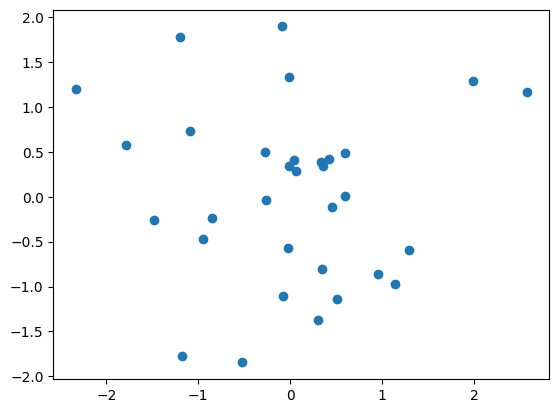

In [3]:
fig, ax = plt.subplots()

xs = X_train[:, 0]
ys = X_train[:, 1]

ax.scatter(xs, ys)

In [4]:
# TODO: Prepro, split into validation

In [27]:
lr = 1e-2
input_dim = X_train.shape[-1]
hidden_dim = 1
nstep = 10_000

def forward(params, X):
    return mx.tanh(X @ params)

params = rnncellnew(input_dim, hidden_dim)
fwd = rnncellfwd
model = (fwd, params)
# params = 1e-2 * mx.random.normal(shape=(input_dim,)) # TODO: Why does making the output dimension 1 fuck everything?
# fwd = forward
# model = (fwd, params)

sgd = sgdnew(lr=lr)

trained_params = sgdsolve(sgd, model, X_train, y_train, nstep=nstep, print_every=100)
print(f"Untrained parameters: {params}")
print(f"Trained parameters: {trained_params}")
print(f"True parameters: {mx.array(true_params)}")

step: 0 | loss: 0.58375
step: 100 | loss: 0.08777
step: 200 | loss: 0.04313
step: 300 | loss: 0.02738
step: 400 | loss: 0.01938
step: 500 | loss: 0.01457
step: 600 | loss: 0.01138
step: 700 | loss: 0.00913
step: 800 | loss: 0.00746
step: 900 | loss: 0.00619
step: 1000 | loss: 0.00520
step: 1100 | loss: 0.00441
step: 1200 | loss: 0.00377
step: 1300 | loss: 0.00324
step: 1400 | loss: 0.00280
step: 1500 | loss: 0.00244
step: 1600 | loss: 0.00213
step: 1700 | loss: 0.00187
step: 1800 | loss: 0.00164
step: 1900 | loss: 0.00145
step: 2000 | loss: 0.00128
step: 2100 | loss: 0.00114
step: 2200 | loss: 0.00101
step: 2300 | loss: 0.00090
step: 2400 | loss: 0.00081
step: 2500 | loss: 0.00072
step: 2600 | loss: 0.00065
step: 2700 | loss: 0.00058
step: 2800 | loss: 0.00053
step: 2900 | loss: 0.00048
step: 3000 | loss: 0.00043
step: 3100 | loss: 0.00039
step: 3200 | loss: 0.00035
step: 3300 | loss: 0.00032
step: 3400 | loss: 0.00029
step: 3500 | loss: 0.00027
step: 3600 | loss: 0.00025
step: 3700 | 